<a href="https://colab.research.google.com/github/MBdjLOTR/Projects/blob/main/neuroscribe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None

Sample Data:
    sl_no gender  ssc_p    ssc

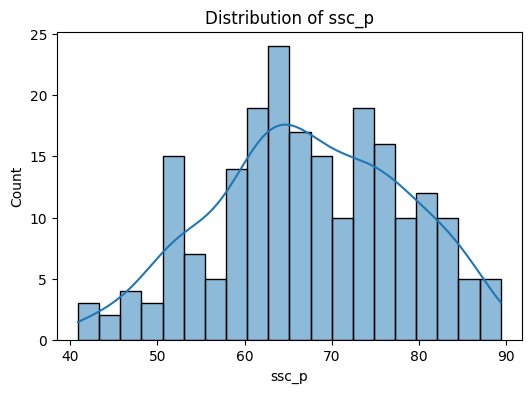

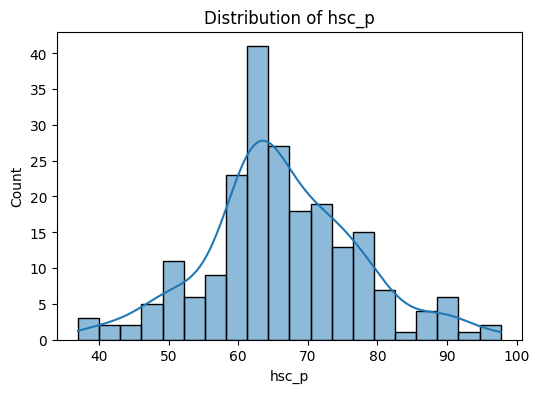

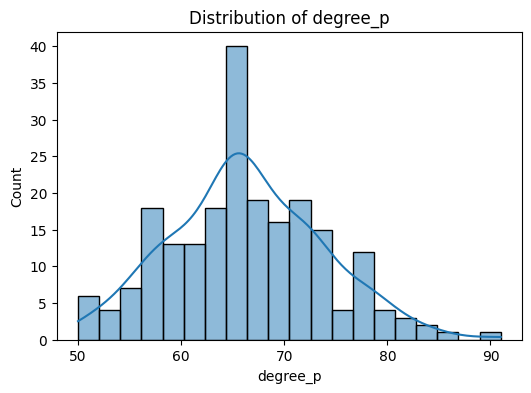

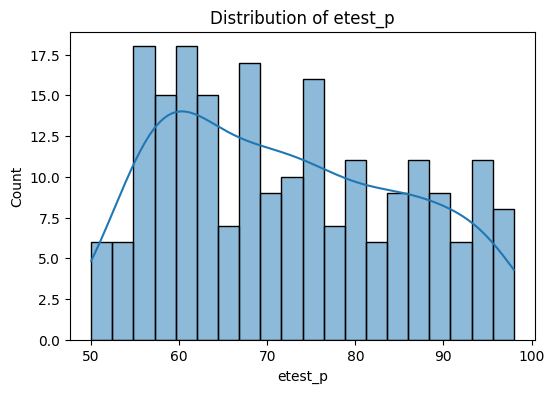

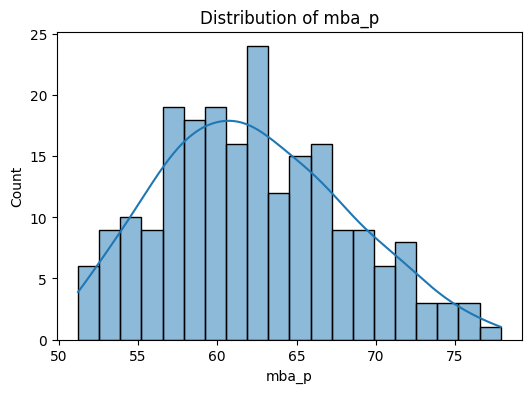

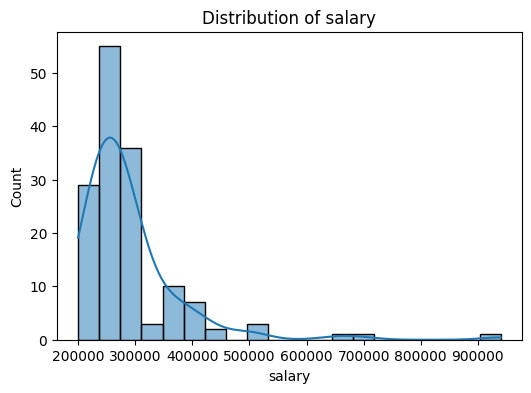

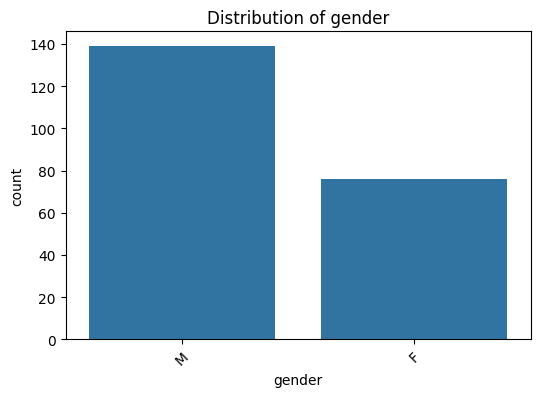

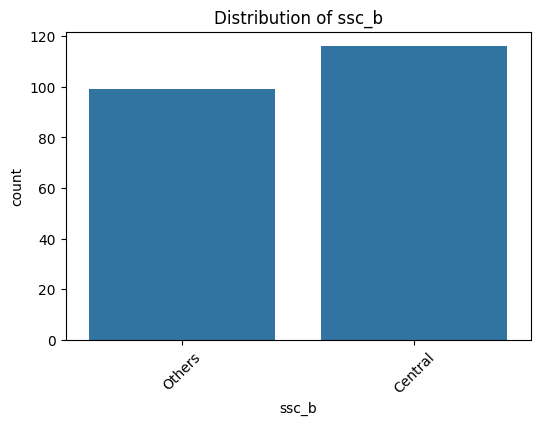

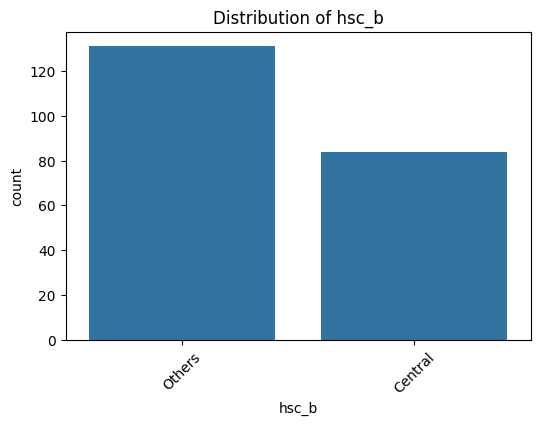

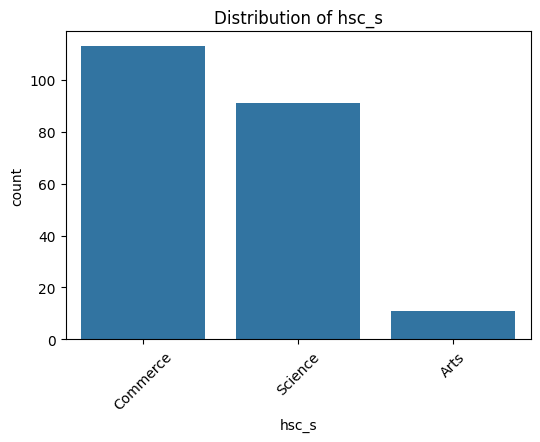

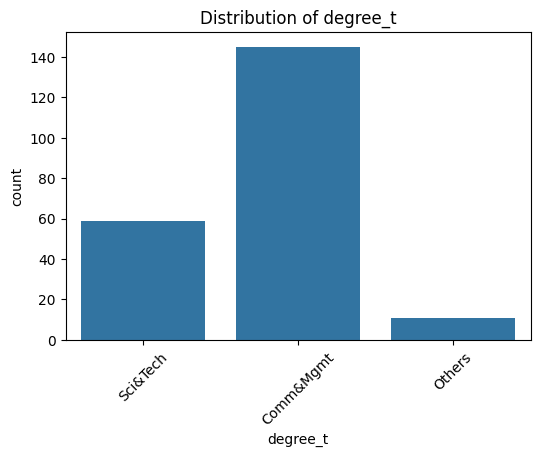

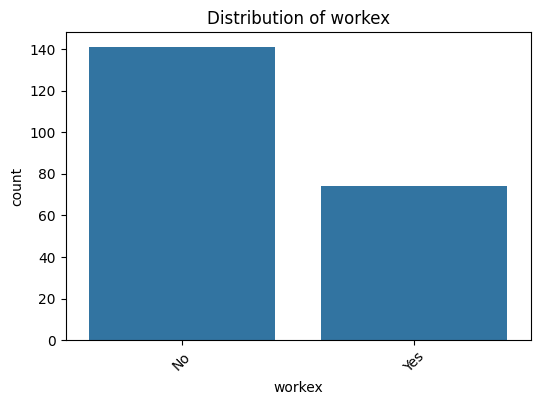

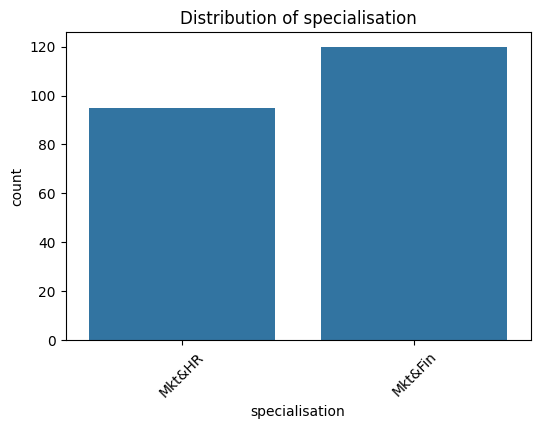

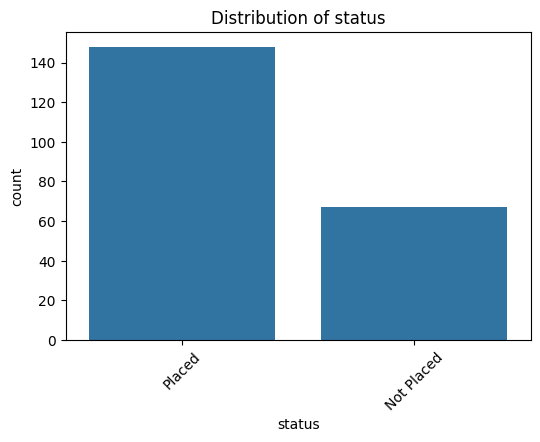

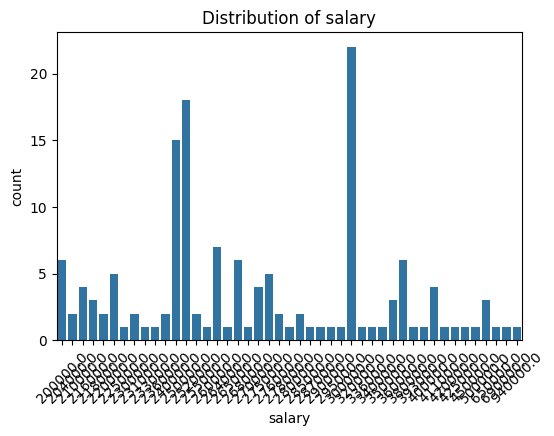

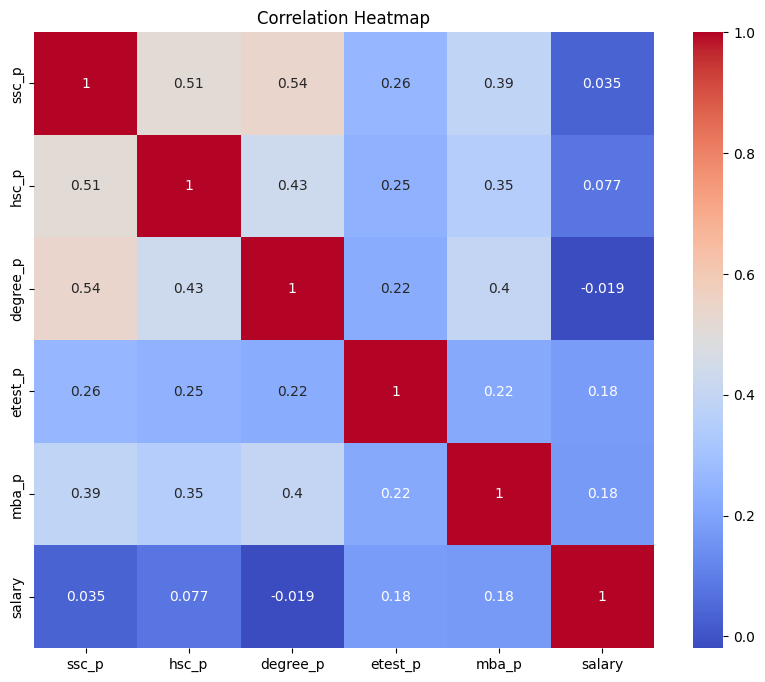

Preprocessing complete. Dataset split into training and testing sets.


<ipython-input-7-c3e25cadc267>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
# Replace 'file.csv' with your file path
data = pd.read_csv('/content/Placement_Data_Full_Class.csv')

# Overview of the data
print("Dataset Overview:")
print(data.info())
print("\nSample Data:\n", data.head())

# Descriptive statistics
print("\nDescriptive Statistics:\n", data.describe())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Visualizing distributions of numeric features
num_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col].dropna(), kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

# Visualizing categorical features
cat_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status','salary']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Heatmap for correlation between numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Handling missing values
for col in num_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)

# Encoding categorical variables
label_encoders = {}
for col in cat_cols:
    if data[col].dtype == 'object':
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])

# Feature scaling
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Splitting dataset into training and testing sets
target = 'status'  # Replace 'status' with your target variable
X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing complete. Dataset split into training and testing sets.")


# Task
code to predict placement based on parameters in given datasets using ml and dl models and graphs comparing accuracy levels and printing them

Here is all the data you need:
"Placement_Data_Full_Class.csv"

## Data loading

### Subtask:
Load the "Placement_Data_Full_Class.csv" dataset.


**Reasoning**:
Load the dataset and display basic information to verify it's loaded correctly.



In [8]:
import pandas as pd

try:
    df = pd.read_csv('Placement_Data_Full_Class.csv')
    display(df.head())
    print(df.shape)
    print(df.info())
except FileNotFoundError:
    print("Error: 'Placement_Data_Full_Class.csv' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


## Data exploration

### Subtask:
Explore the dataset to understand its characteristics.


**Reasoning**:
Analyze the distribution of categorical features and numerical features, check for missing values and calculate descriptive statistics.  Visualize the correlation between numerical features using a heatmap.



sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64
              salary    degree_p     etest_p       mba_p
count     148.000000  215.000000  215.000000  215.000000
mean   288655.405405   66.370186   72.100558   62.278186
std     93457.452420    7.358743   13.275956    5.833385
min    200000.000000   50.000000   50.000000   51.210000
25%    240000.000000   61.000000   60.000000   57.945000
50%    265000.000000   66.000000   71.000000   62.000000
75%    300000.000000   72.000000   83.500000   66.255000
max    940000.000000   91.000000   98.000000   77.890000

Frequency of gender:
gender
M    139
F     76
Name: count, dtype: int64

Frequency of ssc_b:
ssc_b
Central    116
Others      99
Name: count, dtype: int64

Fr

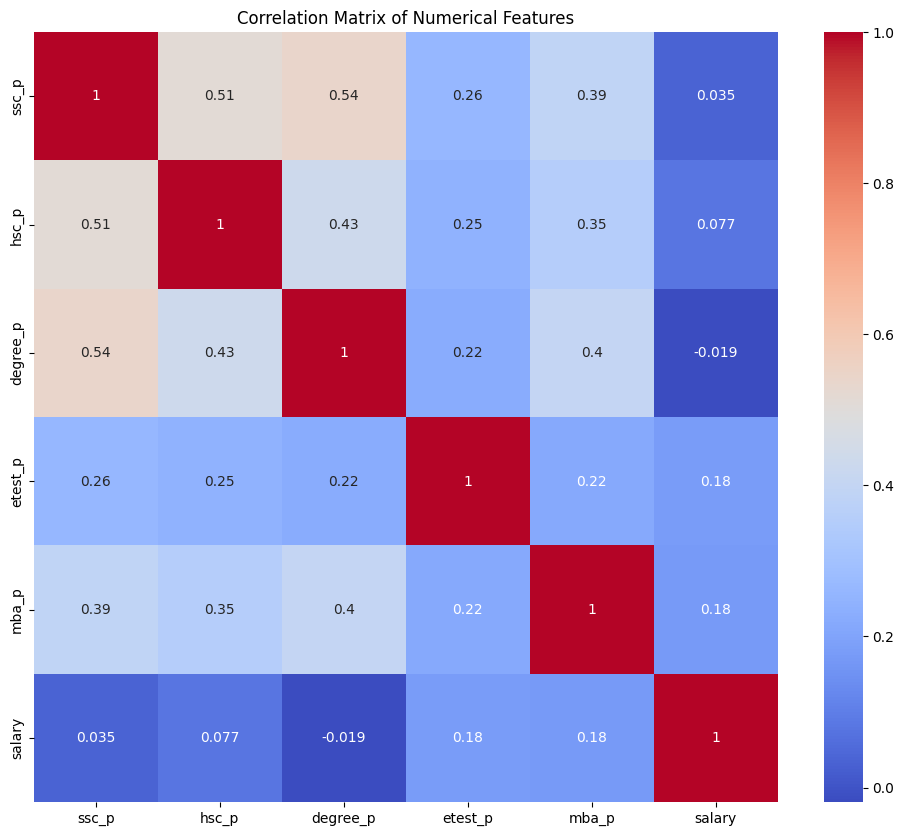

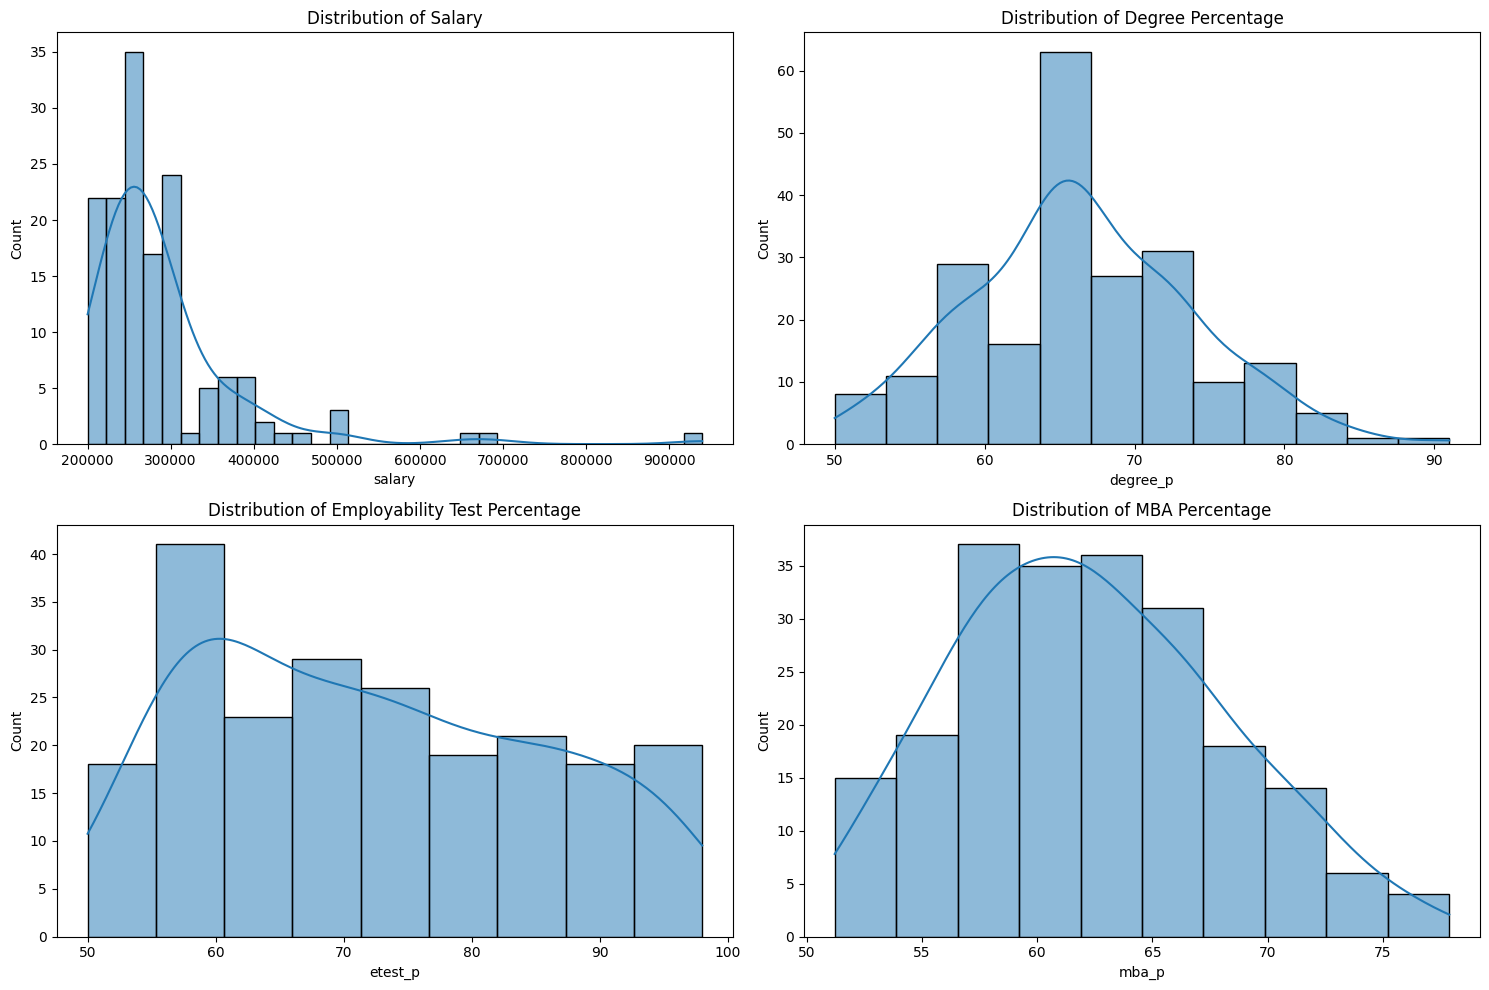

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics for numerical features
print(df[['salary', 'degree_p', 'etest_p', 'mba_p']].describe())

# Analyze categorical features
for col in ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']:
    print(f"\nFrequency of {col}:")
    print(df[col].value_counts())

# Correlation matrix and heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Visualize distributions
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['salary'], kde=True)
plt.title('Distribution of Salary')

plt.subplot(2, 2, 2)
sns.histplot(df['degree_p'], kde=True)
plt.title('Distribution of Degree Percentage')

plt.subplot(2, 2, 3)
sns.histplot(df['etest_p'], kde=True)
plt.title('Distribution of Employability Test Percentage')

plt.subplot(2, 2, 4)
sns.histplot(df['mba_p'], kde=True)
plt.title('Distribution of MBA Percentage')

plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the distribution of 'salary', 'degree_p', 'etest_p', 'mba_p' using box plots, separated by 'status' (placed vs. not placed).



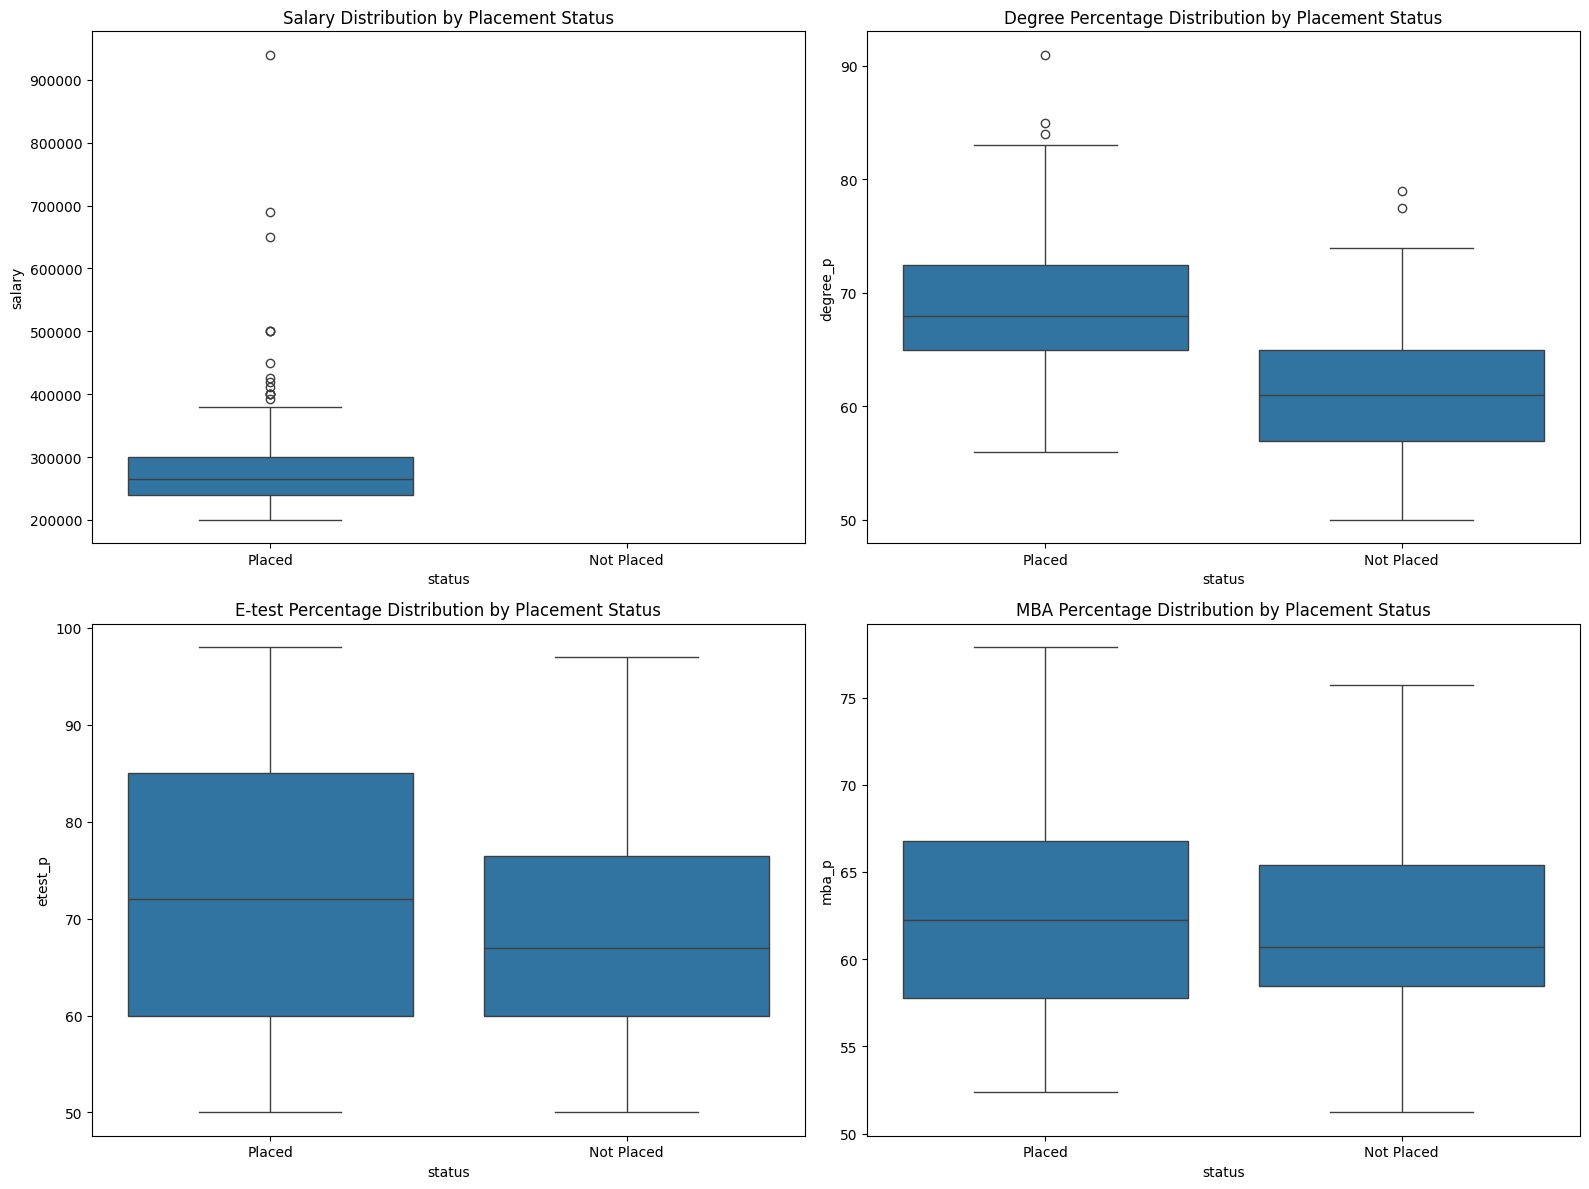

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='status', y='salary', data=df)
plt.title('Salary Distribution by Placement Status')

plt.subplot(2, 2, 2)
sns.boxplot(x='status', y='degree_p', data=df)
plt.title('Degree Percentage Distribution by Placement Status')

plt.subplot(2, 2, 3)
sns.boxplot(x='status', y='etest_p', data=df)
plt.title('E-test Percentage Distribution by Placement Status')

plt.subplot(2, 2, 4)
sns.boxplot(x='status', y='mba_p', data=df)
plt.title('MBA Percentage Distribution by Placement Status')

plt.tight_layout()
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and removing duplicates.


**Reasoning**:
Fill missing values in the 'salary' column with 0 and remove duplicate rows.



In [11]:
# Fill missing salary values with 0
df['salary'].fillna(0, inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

<ipython-input-11-9c78173a252e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(0, inplace=True)


**Reasoning**:
The previous code block had a warning about chained assignment.  I will rewrite the code to avoid chained assignment and correctly fill NaN values and drop duplicates.



In [12]:
# Fill missing salary values with 0, avoiding chained assignment
df['salary'] = df['salary'].fillna(0)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

## Data preparation

### Subtask:
Prepare the data for model training by encoding categorical features and scaling numerical features.


**Reasoning**:
Encode categorical features using one-hot encoding for columns with more than two categories and label encoding for binary columns. Then, scale numerical features using StandardScaler.



In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Identify categorical and numerical columns
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
numerical_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Encode categorical features
for col in categorical_cols:
    if len(df_encoded[col].unique()) > 2:
        # One-hot encode
        df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col)
    else:
        # Label encode
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Scale numerical features
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

display(df_scaled.head())

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,1,-0.028087,1,2.268812,1,-1.140102,0,-1.291091,1,-0.597647,1,0.461711,False,True,False,False,False,True
1,2,1,1.113369,0,1.103448,1,1.513267,1,1.087157,0,0.687620,1,0.008404,False,False,True,False,False,True
2,3,1,-0.213238,0,0.153313,0,-0.322843,0,0.218908,0,-0.769474,1,0.332195,True,False,False,True,False,False
3,4,1,-1.046417,0,-1.318339,0,-1.957362,0,-0.460592,1,-0.489396,0,-1.286761,False,False,True,False,False,True
4,5,1,1.712332,0,0.668391,0,0.943909,0,1.864806,0,-1.164676,1,1.465463,False,True,False,True,False,False


## Data splitting

### Subtask:
Split the preprocessed data into training, validation, and testing sets.


**Reasoning**:
Split the preprocessed data (df_scaled) into training, validation, and testing sets as instructed, using train_test_split and stratifying by the 'status' column.



In [14]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_scaled.drop('status', axis=1)
y = df_scaled['status']

# Split data into training and temporary sets (validation + testing)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

## Feature engineering

### Subtask:
Engineer new features from existing ones in the training dataset (`X_train`) to potentially improve model performance.  These engineered features will then be added to the validation and test sets (`X_val`, `X_test`).


**Reasoning**:
Create new features based on the instructions, then add them to X_train, X_val, and X_test.



In [15]:
# Create a combined academic performance score
X_train['combined_academic_score'] = 0.25 * X_train['ssc_p'] + 0.25 * X_train['hsc_p'] + 0.25 * X_train['degree_p'] + 0.25 * X_train['mba_p']
X_val['combined_academic_score'] = 0.25 * X_val['ssc_p'] + 0.25 * X_val['hsc_p'] + 0.25 * X_val['degree_p'] + 0.25 * X_val['mba_p']
X_test['combined_academic_score'] = 0.25 * X_test['ssc_p'] + 0.25 * X_test['hsc_p'] + 0.25 * X_test['degree_p'] + 0.25 * X_test['mba_p']

# Create interaction terms
X_train['degree_p_workex'] = X_train['degree_p'] * X_train['workex']
X_val['degree_p_workex'] = X_val['degree_p'] * X_val['workex']
X_test['degree_p_workex'] = X_test['degree_p'] * X_test['workex']

X_train['mba_p_specialisation'] = X_train['mba_p'] * X_train['specialisation']
X_val['mba_p_specialisation'] = X_val['mba_p'] * X_val['specialisation']
X_test['mba_p_specialisation'] = X_test['mba_p'] * X_test['specialisation']

X_train['etest_p_workex'] = X_train['etest_p'] * X_train['workex']
X_val['etest_p_workex'] = X_val['etest_p'] * X_val['workex']
X_test['etest_p_workex'] = X_test['etest_p'] * X_test['workex']


# Explore other potential features
X_train['hsc_p_degree_p_diff'] = X_train['hsc_p'] - X_train['degree_p']
X_val['hsc_p_degree_p_diff'] = X_val['hsc_p'] - X_val['degree_p']
X_test['hsc_p_degree_p_diff'] = X_test['hsc_p'] - X_test['degree_p']

X_train['mba_p_degree_p_diff'] = X_train['mba_p'] - X_train['degree_p']
X_val['mba_p_degree_p_diff'] = X_val['mba_p'] - X_val['degree_p']
X_test['mba_p_degree_p_diff'] = X_test['mba_p'] - X_test['degree_p']

display(X_train.head())

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,combined_academic_score,degree_p_workex,mba_p_specialisation,etest_p_workex,hsc_p_degree_p_diff,mba_p_degree_p_diff
93,94,1,-1.416719,0,-0.398557,0,-1.684942,0,-0.007592,1,...,False,True,False,False,-1.170090,-0.0,-1.180141,-0.0,1.286385,0.504801
105,106,1,-0.768691,0,-0.214600,1,-1.140102,0,0.973907,1,...,True,False,False,True,-0.830609,-0.0,-1.199042,0.0,0.925502,-0.058939
169,170,1,-0.679818,1,-2.223405,1,-0.696058,0,-1.330351,1,...,True,False,False,True,-0.762281,-0.0,0.550158,-0.0,-1.527347,1.246216
191,192,1,-0.028087,1,-0.490535,0,0.766836,0,-0.007592,0,...,True,True,False,False,0.007576,0.0,-0.000000,-0.0,-1.257371,-0.984745
205,206,1,-0.583540,1,-0.398557,1,-0.186633,0,-0.762591,0,...,False,True,False,False,-0.527078,-0.0,-0.000000,-0.0,-0.211924,-0.752950


## Model training

### Subtask:
Train several machine learning models and a simple deep learning model on the training data.


**Reasoning**:
Train several machine learning models and a simple deep learning model on the training data.



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Instantiate models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
nb_model = GaussianNB()

# Define the deep learning model
dl_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
dl_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Store trained models (optional, but good practice)
trained_models = {
    "Logistic Regression": logreg_model,
    "Random Forest": rf_model,
    "Support Vector Machine": svm_model,
    "Naive Bayes": nb_model,
    "Deep Learning": dl_model
}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Reasoning**:
The previous code block had a warning about input shape in the deep learning model. I will fix that warning and re-run the model training.



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Instantiate models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
nb_model = GaussianNB()

# Define the deep learning model with Input layer
dl_model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
dl_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Store trained models (optional, but good practice)
trained_models = {
    "Logistic Regression": logreg_model,
    "Random Forest": rf_model,
    "Support Vector Machine": svm_model,
    "Naive Bayes": nb_model,
    "Deep Learning": dl_model
}

## Model optimization

### Subtask:
Optimize the hyperparameters of the trained models using the validation set.


**Reasoning**:
Import necessary libraries and define parameter grids for hyperparameter tuning. Then perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV, and store the optimized models in a dictionary.



In [19]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Support Vector Machine": {
        'C': [0.01, 0.1, 1],
        'gamma': [0.01, 0.1, 1],
        'kernel': ['rbf', 'linear']
    },
    "Naive Bayes": {} # No hyperparameters to tune for Naive Bayes
}

optimized_models = {}
for model_name, model in trained_models.items():
    if model_name in param_grids:
        if model_name == "Support Vector Machine":
            # Use RandomizedSearchCV for SVM due to potential long computation time
            random_search = RandomizedSearchCV(model, param_distributions=param_grids[model_name], n_iter=5, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
            random_search.fit(X_val, y_val)
            optimized_models[model_name] = random_search.best_estimator_
        else:
            grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_val, y_val)
            optimized_models[model_name] = grid_search.best_estimator_
    else:
        optimized_models[model_name] = model


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(s

**Reasoning**:
Fix the error in the previous code block by specifying the solver for Logistic Regression and adjusting the parameter grid to avoid the ValueError. Then execute the code again to complete the hyperparameter tuning.



In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grids for each model, correcting the Logistic Regression grid
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Support Vector Machine": {
        'C': [0.01, 0.1, 1],
        'gamma': [0.01, 0.1, 1],
        'kernel': ['rbf', 'linear']
    },
    "Naive Bayes": {} # No hyperparameters to tune for Naive Bayes
}

optimized_models = {}
for model_name, model in trained_models.items():
    if model_name in param_grids:
        if model_name == "Support Vector Machine":
            # Use RandomizedSearchCV for SVM due to potential long computation time
            random_search = RandomizedSearchCV(model, param_distributions=param_grids[model_name], n_iter=5, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
            random_search.fit(X_val, y_val)
            optimized_models[model_name] = random_search.best_estimator_
        else:
            grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_val, y_val)
            optimized_models[model_name] = grid_search.best_estimator_
    else:
        optimized_models[model_name] = model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Reasoning**:
The previous code execution shows a ConvergenceWarning for the Logistic Regression model.  To address this, I'll increase the `max_iter` parameter for the Logistic Regression model in the parameter grid.  This will allow the solver more iterations to converge.



In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grids for each model, increasing max_iter for Logistic Regression
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'max_iter': [1000] # Increased max_iter
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Support Vector Machine": {
        'C': [0.01, 0.1, 1],
        'gamma': [0.01, 0.1, 1],
        'kernel': ['rbf', 'linear']
    },
    "Naive Bayes": {} # No hyperparameters to tune for Naive Bayes
}

optimized_models = {}
for model_name, model in trained_models.items():
    if model_name in param_grids:
        if model_name == "Support Vector Machine":
            # Use RandomizedSearchCV for SVM due to potential long computation time
            random_search = RandomizedSearchCV(model, param_distributions=param_grids[model_name], n_iter=5, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
            random_search.fit(X_val, y_val)
            optimized_models[model_name] = random_search.best_estimator_
        else:
            grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_val, y_val)
            optimized_models[model_name] = grid_search.best_estimator_
    else:
        optimized_models[model_name] = model

## Model evaluation

### Subtask:
Evaluate the performance of the optimized models on the test dataset.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,Random Forest,0.969697,0.958333,1.000000,0.978723,0.950000
2,Support Vector Machine,0.696970,0.696970,1.000000,0.821429,0.500000
3,Naive Bayes,1.000000,1.000000,1.000000,1.000000,1.000000
4,Deep Learning,0.727273,0.733333,0.956522,0.830189,0.795652


<ipython-input-22-ceb4e047c56b>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


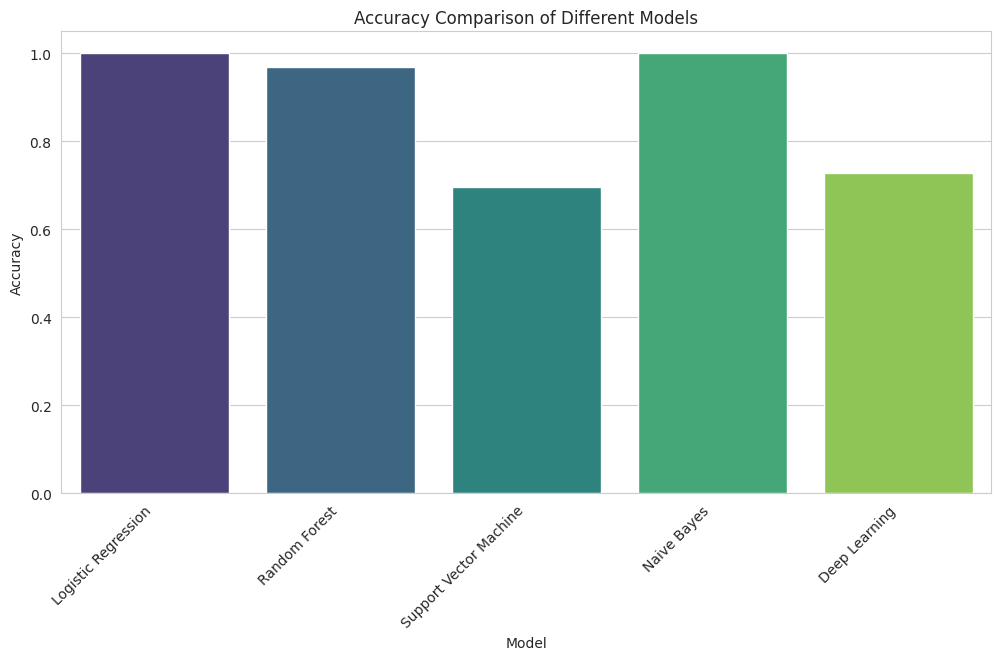

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = []
for model_name, model in optimized_models.items():
    y_pred = model.predict(X_test)

    # Convert y_pred to binary for deep learning model
    if model_name == "Deep Learning":
        y_pred = (y_pred > 0.5).astype(int)  # Convert to binary using threshold of 0.5

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # AUC for binary classification models
    if model_name != "Deep Learning": # Assuming Deep Learning model uses sigmoid output
        auc = roc_auc_score(y_test, y_pred)
    else:
        y_pred_proba = model.predict(X_test) # Get predicted probabilities for AUC calculation
        auc = roc_auc_score(y_test, y_pred_proba)

    results.append([model_name, accuracy, precision, recall, f1, auc])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])
display(results_df)
# Save the best model for later use (example using joblib)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results_df' is your DataFrame containing model evaluation results

# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier, Lasso
from sklearn.feature_selection import RFE
# (For WEKA and J48, you'll need to install and configure the WEKA library)
from weka.classifiers import Classifier
from weka.core.converters import Loader
from catboost import CatBoostClassifier
# ...

# (For K-Means Clustering, you'll likely need to focus on a specific clustering task)
from sklearn.cluster import KMeans
# ...

# Import for Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

# Import for SMOTE
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier, Lasso
from sklearn.feature_selection import RFE
# (For WEKA and J48, you'll need to install and configure the WEKA library)
# from weka.classifiers import Classifier  # Commented out as it requires WEKA setup
# from weka.core.converters import Loader  # Commented out as it requires WEKA setup
from catboost import CatBoostClassifier
# ...

# (For K-Means Clustering, you'll likely need to focus on a specific clustering task)
# from sklearn.cluster import KMeans  # Commented out as it requires specific clustering task
# ...

# Import for Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

# Import for SMOTE
from imblearn.over_sampling import SMOTE

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Increased max_iter
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    # "WEKA (J48)": Classifier(classname="weka.classifiers.trees.J48"), # Requires WEKA setup
    # "K-Means Clustering": KMeans(), # Requires specific clustering task
    "Multilayer Perceptron": MLPClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Ridge": RidgeClassifier(),
    "Lasso": Lasso(),
    # "RFE": RFE(estimator=LogisticRegression()), # RFE is a feature selection method, not a model
    # "ID3": # ID3 is similar to DecisionTreeClassifier
    "CATBoost": CatBoostClassifier(verbose=0)  # Assuming CatBoost is installed
}


results = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Convert continuous predictions to binary (if necessary)
    if model_name in ["Logistic Regression", "Gaussian Naive Bayes", "Support Vector Machine", "Ridge", "Lasso"]:
        y_pred = (y_pred > 0.5).astype(int)  # Assuming 0.5 as the threshold

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    results.append([model_name, accuracy])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(results_df)



                          Model  Accuracy
0           Logistic Regression  1.000000
1          Gaussian Naive Bayes  1.000000
2                 Decision Tree  1.000000
3                 Random Forest  1.000000
4             Gradient Boosting  1.000000
5                      AdaBoost  1.000000
6                       XGBoost  1.000000
7           K-Nearest Neighbors  0.674419
8        Support Vector Machine  0.720930
9         Multilayer Perceptron  0.720930
10  Stochastic Gradient Descent  0.279070
11                  Extra Trees  1.000000
12                        Ridge  1.000000
13                        Lasso  0.720930
14                     CATBoost  1.000000


<ipython-input-26-5fdda2ac8a47>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


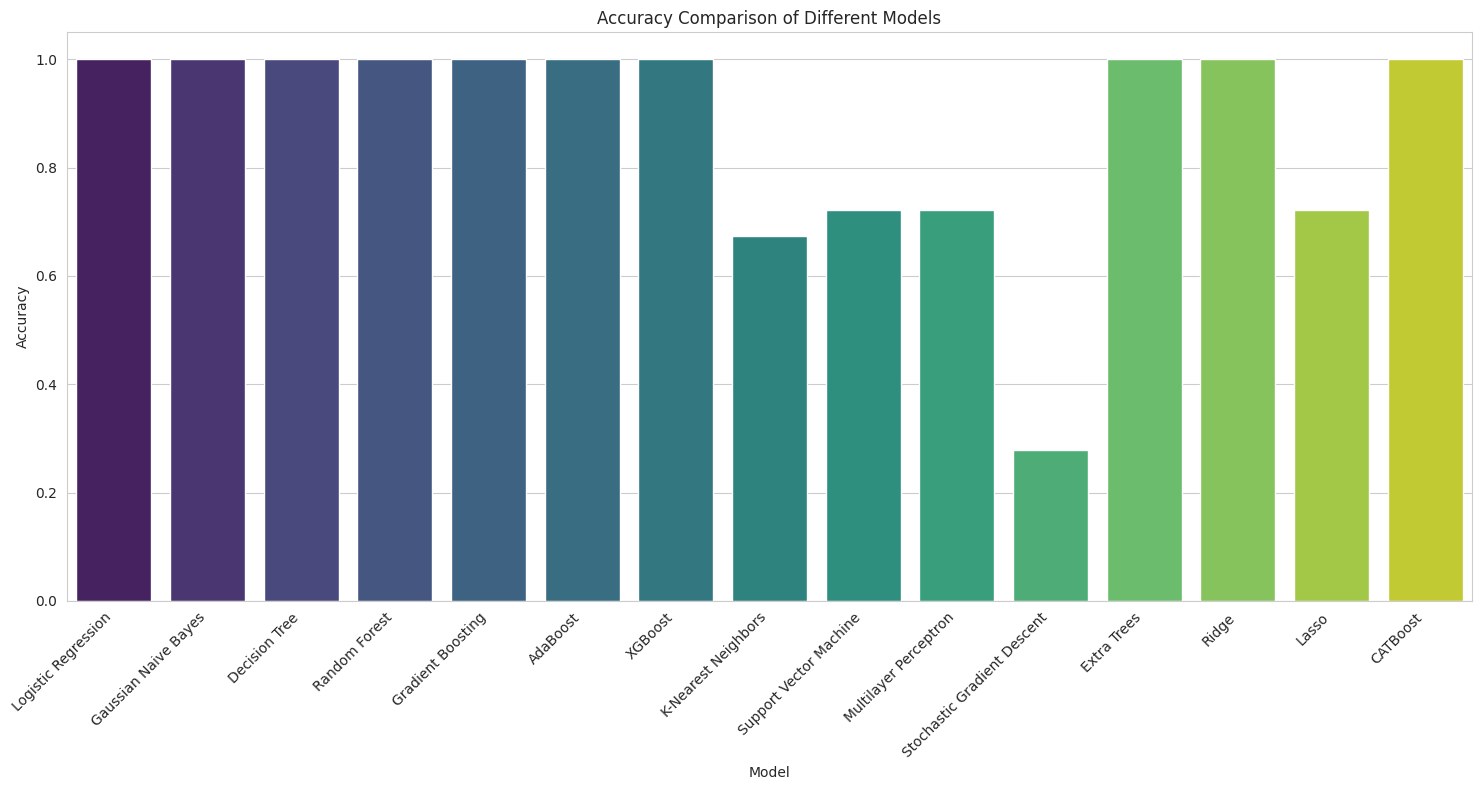

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Different Models")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [27]:
# Example of model combination using voting
from sklearn.ensemble import VotingClassifier

# Select top models (e.g., Random Forest, XGBoost, SVM)
top_models = [
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier()),
    ('svm', SVC(probability=True)),  # Enable probability for soft voting
]

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=top_models, voting='soft')  # Use 'soft' for probability averaging

# Train and evaluate the voting classifier
voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print(f"Voting Classifier Accuracy: {accuracy_voting}")

Voting Classifier Accuracy: 1.0


In [2]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [22]:
pip install weka


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for weka: filename=weka-2.0.2-py3-none-any.whl size=83993 sha256=4fc9ffb9d974bde5d426bca74d13be200b28625feeec679187b21603465cf954
  Stored in directory: /root/.cache/pip/wheels/de/27/88/5075616d0bf1d6923fe5315290f529e70d542bccf9141284b6
Successfully built weka


In [24]:
import os

# Install the weka package
!pip install python-weka-wrapper3
# Set the path to the Weka JAR file
os.environ["WEKA_JAR_PATH"] = "/usr/share/java/weka.jar"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 25.1 MB/s eta 0:00:00
  Created wheel for python-weka-wrapper3: filename=python_weka_wrapper3-0.3.2-py3-none-any.whl size=14495848 sha256=11a3ced2b879ff350f683816f1785c9cc105b91a114c08ee1dd2a82e146868a2
  Stored in directory: /root/.cache/pip/wheels/fb/06/1b/0ef888fd5d05a9447b3be649334dccae64efff5823f66ffd3b
  Created wheel for configurable-objects: filename=configurable_objects-0.0.1-py3-none-any.whl size=4696 sha256=c841d305cfd0ddc64b4382e16264b8c2118865ade1e689e5b83ce116f18742e2
  Stored in directory: /root/.cache/pip/wheels/de/a2/0c/e5b214e69c592cdfa882f1b30e9fae4a05d9c9ad6d4b91c272
  Created wheel for simple-data-flow: filename=simple_data_flow-0.0.1-py3-none-any.whl size=19058 sha2